In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, TransferFunction
import sympy as sp

In [5]:
t = np.linspace(0, 100, 500)
F_step = 1 / 3

C_tf = TransferFunction([10/3], [5, 1, 0])
Cm_tf = TransferFunction([10/3], [75, 20, 1, 0])
_, F_response = step(TransferFunction([F_step], [1]), T=t)
_, C_response = step(C_tf, T=t)
_, Cm_response = step(Cm_tf, T=t)

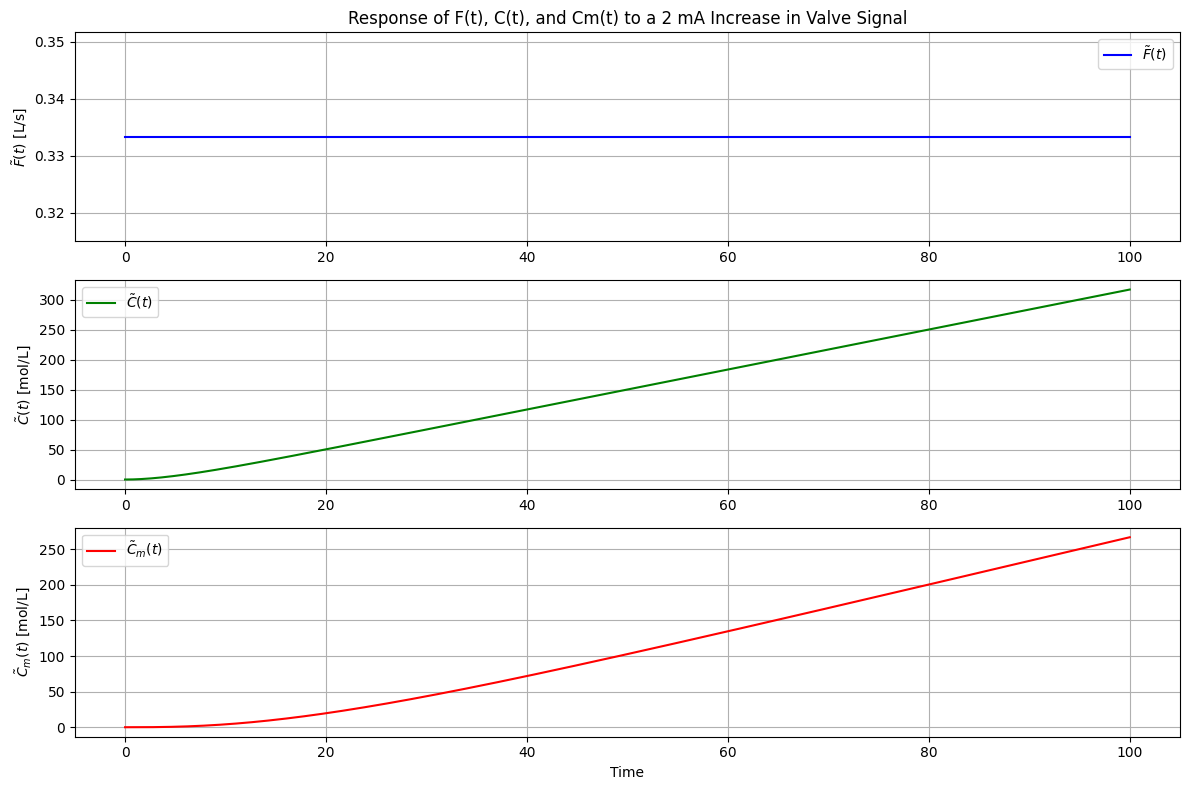

In [6]:


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, F_response, label=r'$\tilde{F}(t)$', color='blue')
plt.ylabel(r'$\tilde{F}(t)$ [L/s]')
plt.title("Response of F(t), C(t), and Cm(t) to a 2 mA Increase in Valve Signal")
plt.legend()
plt.grid()

# Plot C(t)
plt.subplot(3, 1, 2)
plt.plot(t, C_response, label=r'$\tilde{C}(t)$', color='green')
plt.ylabel(r'$\tilde{C}(t)$ [mol/L]')
plt.legend()
plt.grid()

# Plot Cm(t)
plt.subplot(3, 1, 3)
plt.plot(t, Cm_response, label=r'$\tilde{C}_m(t)$', color='red')
plt.xlabel('Time')
plt.ylabel(r'$\tilde{C}_m(t)$ [mol/L]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [18]:
def s_to_time_domain(s_function):
    return sp.inverse_laplace_transform(s_function, s, t)

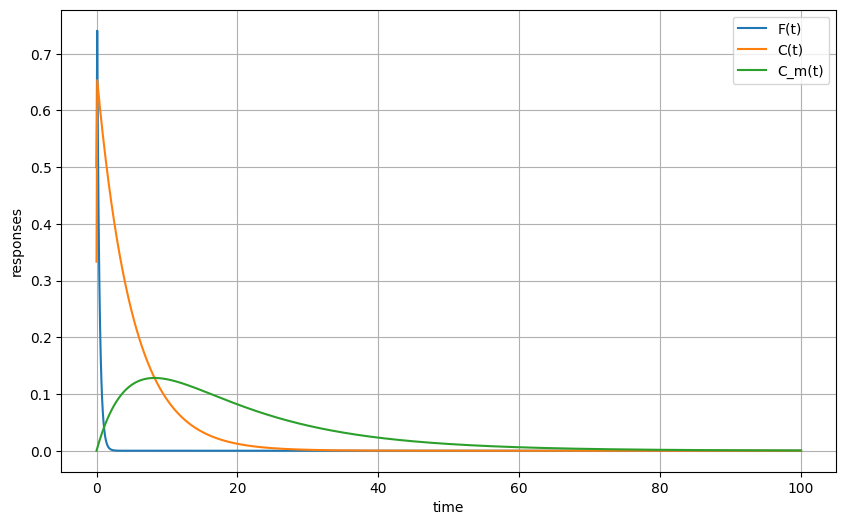

In [19]:
s, t = sp.symbols('s t')

F_s = 1 / (s + 3)
C_s = 10 / (15 * s + 3)
C_m_s = (1 / (15 * s + 1)) * C_s

F_t = s_to_time_domain(F_s)
C_t = s_to_time_domain(C_s)
C_m_t = s_to_time_domain(C_m_s)

F_t_func = sp.lambdify(t, F_t, modules="numpy")
C_t_func = sp.lambdify(t, C_t, modules="numpy")
C_m_t_func = sp.lambdify(t, C_m_t, modules="numpy")

time_values = np.linspace(0, 100, 1000)

F_t_values = F_t_func(time_values)
C_t_values = C_t_func(time_values)
C_m_t_values = C_m_t_func(time_values)

plt.figure(figsize=(10, 6))
plt.plot(time_values, F_t_values, label='F(t)')
plt.plot(time_values, C_t_values, label='C(t)')
plt.plot(time_values, C_m_t_values, label='C_m(t)')
plt.xlabel('time')
plt.ylabel('responses')
plt.legend()
plt.grid()
plt.show()
